- 1) 데이터 특성
  - 기술통계량
  - 결측치
  - 이상치
 
- 2) 파생변수
  - 연속형 data 구간화 온도를 300이상 = 1, 300이하 =0 하고 박스 플롯으로 확인
  - 구간화

- 3) 관리도 : Temp
- 4) 공정능력 : Temp
- 5) 그래프 분석 + 통계적 가설검정
- 6) 상관분석
- 7) 다중회귀분석 -Vital Few 선정
- 8) 최적구간 선정 -HCR구간 , 이건 안해도됨

In [20]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest# 환경 설정

import matplotlib
# 한글 설치(윈도우 버전)
matplotlib.rc('font',family='Malgun Gothic')
# 음수 표시
matplotlib.rc('axes',unicode_minus=False)
# 그래프 출력
%matplotlib inline

# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

In [147]:
import pandas as pd
# 설비 데이터 Y가 없음
df_raw = pd.read_csv('hotrolling.csv')
df_raw

,temp,SLABweight,SLABwide,SLABthick,SLABlong,RolljoblinLT,SHEARinLT,TSmean
0,571,30.6 ton,1570 mm,250 mm,9970 mm,14.3,8.0,255
1,351,23.65 ton,1020 mm,250 mm,11860 mm,10.3,13.4,340
2,460,34.63 ton,1500 mm,250 mm,11810 mm,14.6,7.5,253
3,488,28.94 ton,1570 mm,250 mm,9430 mm,14.4,7.8,252
4,335,34.81 ton,1500 mm,250 mm,11870 mm,14.7,7.2,253
...,...,...,...,...,...,...,...,...
998,398,31.68 ton,1370 mm,NaN,11830 mm,14.5,11.5,328
999,580,23.28 ton,1220 mm,250 mm,9760 mm,12.8,9.5,546
1000,625,16.88 ton,950 mm,250 mm,9090 mm,11.6,4.2,342
1001,398,31.68 ton,1370 mm,250 mm,11830 mm,14.5,11.5,328


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          1003 non-null   int64  
 1   SLABweight    1002 non-null   object 
 2   SLABwide      1003 non-null   object 
 3   SLABthick     1002 non-null   object 
 4   SLABlong      1003 non-null   object 
 5   RolljoblinLT  1003 non-null   float64
 6   SHEARinLT     1003 non-null   float64
 7   TSmean        1003 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.8+ KB


In [4]:
df_raw.dropna(inplace=True)

In [5]:
df_raw.isnull().sum()

# 결측치 제거
# 이상치 SLABweight 1개 , SLABthick 1개 

# 이산형 변수 
# SLABweight       object 
# SLABwide         object 
# SLABthick        object 
#SLABlong         object 

temp            0
SLABweight      0
SLABwide        0
SLABthick       0
SLABlong        0
RolljoblinLT    0
SHEARinLT       0
TSmean          0
dtype: int64

In [6]:
df_raw.columns

Index(['temp', 'SLABweight', 'SLABwide', 'SLABthick', 'SLABlong',
       'RolljoblinLT', 'SHEARinLT', 'TSmean'],
      dtype='object')

In [7]:
df_raw.describe()

,temp,RolljoblinLT,SHEARinLT,TSmean
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,479.742258,9.771229,9.819780,352.261738
std,137.522011,2.814184,5.268323,74.152569
min,124.000000,2.500000,0.300000,243.000000
25%,369.000000,7.800000,5.500000,313.000000
50%,477.000000,10.000000,9.300000,336.000000
75%,588.000000,11.800000,12.900000,352.000000
max,837.000000,15.400000,36.400000,550.000000


### 수치형 변수를 단위에 따라 분리하는 것은
- 데이터 분석,모델링,결과 해석에 있어 하는 것이다.
- 1) 데이터의 명확성 및 일관성 유지
     - 단위의 명확성 : 서로 다른 단위를 사용하는 변수를 함께 사용하면 데이터의 의미를 혼동하기 때문
     - 데이터 일관성 : 단위가 다른 변수를 분리하여 처리함으러서 , 이는 데이터 전처리 과정에서 오류를 줄이는 데 도움이 됩니다.

- 2) 모델의 성능 향상 :
  - 정규화 및 스케일링 : 모델이 특정 변수가 과도하게 큰 값이나 작은 값으로 인해 잘못 학습된는 것을 방지
  - 모델의 해석가능성 : 단위가 다른 변수를 분리함으로써 모델의 해석 가능성을 높일 수 있다.

- 3) 데이터 전처리 및 변환의 용이성
     - 특성 공학 : 단위에 따라 변수를 분리하면 새로운 파생 변수를 생성하거나 , 변수 간의 상호작용을 고려한 변수를 쉽게 만들 수 있다.

In [149]:
# 단위 분리 및 숫자로 변환 ,데이터 타입 float64
df_raw['SLABweight'] = df_raw['SLABweight'].str.replace(" ton", "").astype(float)

df_raw['SLABwide'] = df_raw['SLABwide'].str.replace(" mm", "").astype(float)
df_raw['SLABthick'] = df_raw['SLABthick'].str.replace(" mm", "").astype(float)
df_raw['SLABlong'] = df_raw['SLABlong'].str.replace(" mm", "").astype(float)

In [151]:
# 정규화
scaler = StandardScaler()
numeric_columns = ['SLABweight', 'SLABwide', 'SLABthick', 'SLABlong', 'RolljoblinLT', 'SHEARinLT', 'TSmean']
df_raw[numeric_columns] = scaler.fit_transform(df_raw[numeric_columns])

In [153]:
df_raw

,temp,SLABweight,SLABwide,SLABthick,SLABlong,RolljoblinLT,SHEARinLT,TSmean
0,571,1.364804,1.672837,0.247865,0.117235,1.606750,-0.344977,-1.313062
1,351,0.015278,-1.054900,0.247865,1.470621,0.185550,0.680918,-0.165131
2,460,2.147334,1.325671,0.247865,1.434817,1.713341,-0.439967,-1.340072
3,488,1.042471,1.672837,0.247865,-0.269446,1.642281,-0.382973,-1.353577
4,335,2.182286,1.325671,0.247865,1.477782,1.748871,-0.496961,-1.340072
...,...,...,...,...,...,...,...,...
998,398,1.574514,0.680933,NaN,1.449139,1.677811,0.319955,-0.327192
999,580,-0.056567,-0.062995,0.247865,-0.033141,1.073800,-0.060006,2.616914
1000,625,-1.299295,-1.402066,0.247865,-0.512913,0.647440,-1.066903,-0.138121
1001,398,1.574514,0.680933,0.247865,1.449139,1.677811,0.319955,-0.327192


In [158]:
# 항목유형 변경 필요성 검토하기
# 항목의 유형(데이터 타입) 변경 필요성을 검토하는 이유는 데이터 분석 및 처리의 정확성, 효율성, 그리고 해석 가능성을 높이기 위함입니다. 
df_raw.dtypes

temp              int64
SLABweight      float64
SLABwide        float64
SLABthick       float64
SLABlong        float64
RolljoblinLT    float64
SHEARinLT       float64
TSmean          float64
dtype: object

### 파생변수의 필요성 검토
파생 변수(또는 특징, 피처)를 생성하고 필요성을 검토하는 이유는 데이터 분석, 모델링, 그리고 예측 성능을 향상시키기 위해서입니다

In [ ]:
df_raw.head()

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          1001 non-null   int64  
 1   SLABweight    1001 non-null   float64
 2   SLABwide      1001 non-null   float64
 3   SLABthick     1001 non-null   float64
 4   SLABlong      1001 non-null   float64
 5   RolljoblinLT  1001 non-null   float64
 6   SHEARinLT     1001 non-null   float64
 7   TSmean        1001 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 70.4 KB


In [12]:
# 범주형 변수화 필요성 확인
# 온도 데이터를 300도를 기준으로 이진 변수화합니다.
# temp를 기준으로 이진 변수 생성 300도 넘으면 1 300도 이하 0
df_raw['temp_binary'] = df_raw['temp'].apply(lambda x: 1 if x > 300 else 0)

In [13]:
df_raw.head()

,temp,SLABweight,SLABwide,SLABthick,SLABlong,RolljoblinLT,SHEARinLT,TSmean,temp_binary
0,571,30.60,1570.0,250.0,9970.0,14.3,8.0,255,1
1,351,23.65,1020.0,250.0,11860.0,10.3,13.4,340,1
2,460,34.63,1500.0,250.0,11810.0,14.6,7.5,253,1
3,488,28.94,1570.0,250.0,9430.0,14.4,7.8,252,1
4,335,34.81,1500.0,250.0,11870.0,14.7,7.2,253,1


In [15]:
# temp 열을 기준으로 구간화하여 새로운 파생 변수 temp_binary 생성
import numpy as np
df_raw['temp_binary'] = np.where(df_raw['temp'] > 300, 1, 0)

df_raw.head()

,temp,SLABweight,SLABwide,SLABthick,SLABlong,RolljoblinLT,SHEARinLT,TSmean,temp_binary
0,571,30.60,1570.0,250.0,9970.0,14.3,8.0,255,1
1,351,23.65,1020.0,250.0,11860.0,10.3,13.4,340,1
2,460,34.63,1500.0,250.0,11810.0,14.6,7.5,253,1
3,488,28.94,1570.0,250.0,9430.0,14.4,7.8,252,1
4,335,34.81,1500.0,250.0,11870.0,14.7,7.2,253,1


In [24]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          1001 non-null   int64  
 1   SLABweight    1001 non-null   float64
 2   SLABwide      1001 non-null   float64
 3   SLABthick     1001 non-null   float64
 4   SLABlong      1001 non-null   float64
 5   RolljoblinLT  1001 non-null   float64
 6   SHEARinLT     1001 non-null   float64
 7   TSmean        1001 non-null   int64  
 8   temp_binary   1001 non-null   int32  
dtypes: float64(6), int32(1), int64(2)
memory usage: 74.3 KB


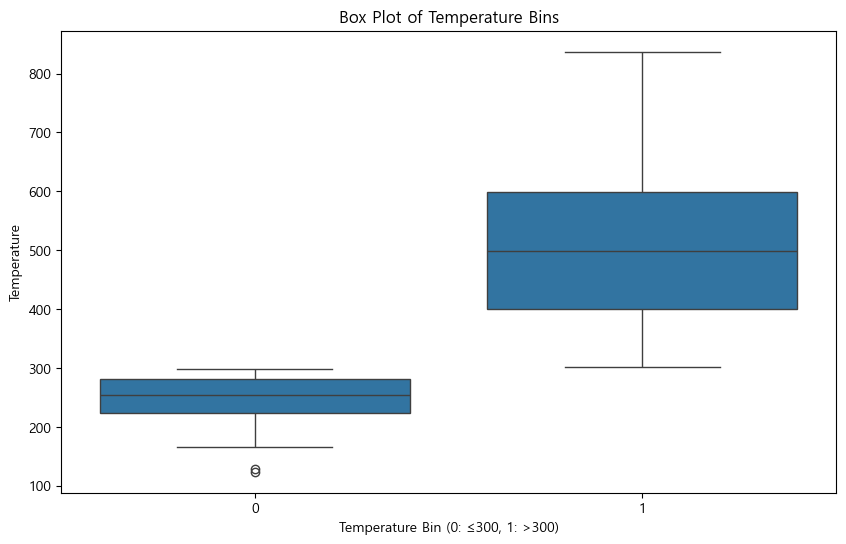

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





# 박스 플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='temp_binary', y='temp', data=df_raw)
plt.title('Box Plot of Temperature Bins')
plt.xlabel('Temperature Bin (0: ≤300, 1: >300)')
plt.ylabel('Temperature')
plt.show()

# 300 도 이하인 온도가 이상치 2개 발견
# 이상치 처리는 안할거임

In [127]:
#IQR을 이용한 이상치 수치적 확인
# IQR을 이용한 이상치 수치적 확인 함수
def find_outliers(df_raw, column):
    Q1 = df_raw[column].quantile(0.25)
    Q3 = df_raw[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_raw[(df_raw[column] < lower_bound) | (df_raw[column] > upper_bound)]
    return outliers

# 이상치 찾기
outliers = find_outliers(df_raw, 'temp')

# 이상치 출력
print("이상치:\n", outliers)


이상치:
 Empty DataFrame
Columns: [temp, SLABweight, SLABwide, SLABthick, SLABlong, RolljoblinLT, SHEARinLT, TSmean, temp_binary]
Index: []


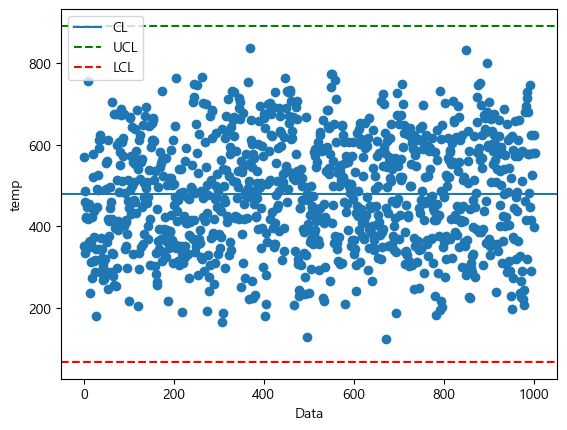

In [133]:
#individual 관리도
plt.scatter(df_raw.index,df_raw.temp,marker="o")
plt.xlabel("Data")
plt.ylabel("temp")
plt.axhline(y=np.mean(df_raw['temp']),linestyle='-',label='CL')
plt.axhline(y=np.mean(df_raw['temp'])+3*np.std(df_raw['temp']),linestyle='--',color='green',label='UCL')
plt.axhline(y=np.mean(df_raw['temp'])-3*np.std(df_raw['temp']),linestyle='--',color='red',label='LCL')
plt.legend()
plt.show()

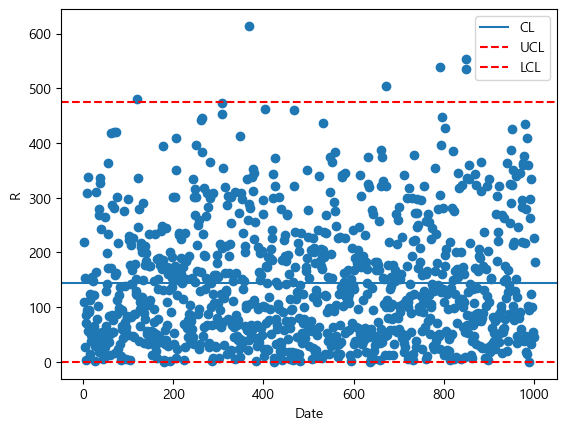

In [46]:
# Moving Range 관리도
df = df_raw[['temp']]
df['R'] = df['temp'].diff()
df['R'] = np.abs(df['R'])
df = df.dropna()
plt.scatter(df.index,df.R,marker='o')
plt.xlabel("Date")
plt.ylabel("R")
plt.axhline(y=np.mean(df['R']),linestyle='-',label='CL')
plt.axhline(y=np.mean(df['R'])+3*np.std(df['R']),linestyle='--',color='red',label='UCL')
if (np.mean(df['R'])-3*np.std(df['R'])) <0:
    plt.axhline(y=0,linestyle='dashed',color='red',label='LCL')
else:
    plt.axhline(y=np.mean(df['R'])-3*np.std(df['R']),linestyle='dashed',color='red',label='LCL')
plt.legend()
plt.show()

In [85]:
# 평균, 표준편차 계산
mean_R = np.mean(df['R'])
std_R = np.std(df['R'])

# 공정능력 지표 계산
LSL = 300
mean_temp = np.mean(df['temp'])

Cpk = min((mean_temp - LSL) / (3 * std_R), np.nan)  # USL이 주어지지 않았으므로 np.nan을 사용
# 결과 출력
print(f"Cpk: {Cpk:.2f}")

Cpk: 0.54


Cpk 값의 해석
Cpk > 1.33: 공정이 매우 능력이 있으며, 제품이 규격 한계 내에 있을 가능성이 높습니다.
1.00 < Cpk ≤ 1.33: 공정이 규격 한계 내에 대부분의 제품을 생산할 수 있지만, 약간의 개선이 필요할 수 있습니다.
Cpk = 1.00: 공정이 규격 한계 내에 정확히 맞춰져 있습니다. 그러나 변동성이 증가하면 규격 한계를 벗어날 위험이 있습니다.
Cpk < 1.00: 공정이 규격 한계를 벗어날 가능성이 높으며, 제품 품질이 불량할 수 있습니다. 공정 개선이 필요합니다.

- 요약
Cpk가 0.54인 경우, 현재 공정이 규격 한계에 비해 상당히 불안정하며, 공정 능력을 향상시키기 위한 적극적인 개선 조치가 필요함을 의미합니다. 공정의 변동성을 줄이고, 제품 품질을 향상시키기 위해 공정 조건을 재검토하고 최적화해야 합니다.

### 변수 간의 경향성 파악 - 그래프 분석

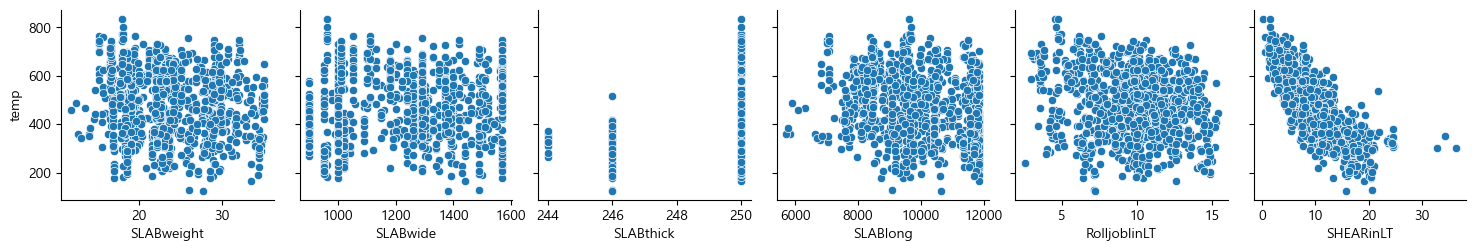

In [55]:
# 산점도 행렬
sns.pairplot(df_raw,y_vars="temp",x_vars=['SLABweight', 'SLABwide', 'SLABthick', 'SLABlong', 'RolljoblinLT', 'SHEARinLT'])

# 트랜드에서 벗어나는 이상치들은 회귀 적합선에 변동 영향을 준다.

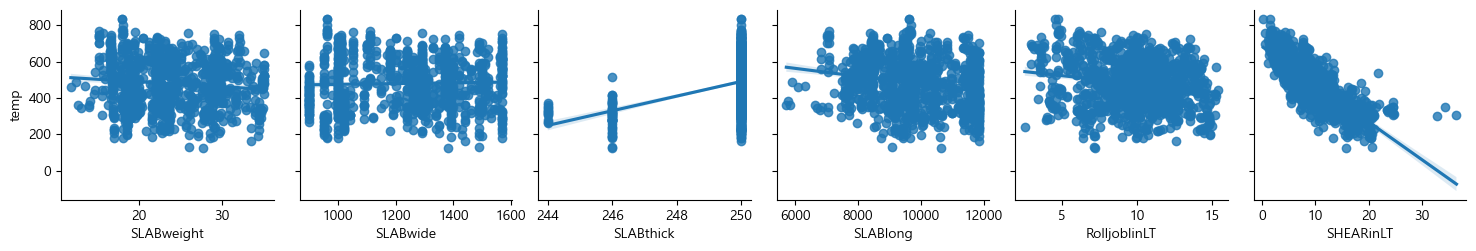

In [59]:
# 산점도 행렬
sns.pairplot(df_raw,y_vars="temp",x_vars=['SLABweight', 'SLABwide', 'SLABthick', 'SLABlong', 'RolljoblinLT', 'SHEARinLT'],kind="reg")

# 트랜드에서 벗어나는 이상치들은 회귀 적합선에 변동 영향을 준다.

# SLABweight , SLABwide , SLABlong , RolljoblinLT , SHEARinLT 음의 관계 , 
# SLABthick 양의 관계

# SLABthick 빼고는 온도가 높으면 나머지는 낮아지고 SHEARinLT가 젤 크게 반 비례한다.

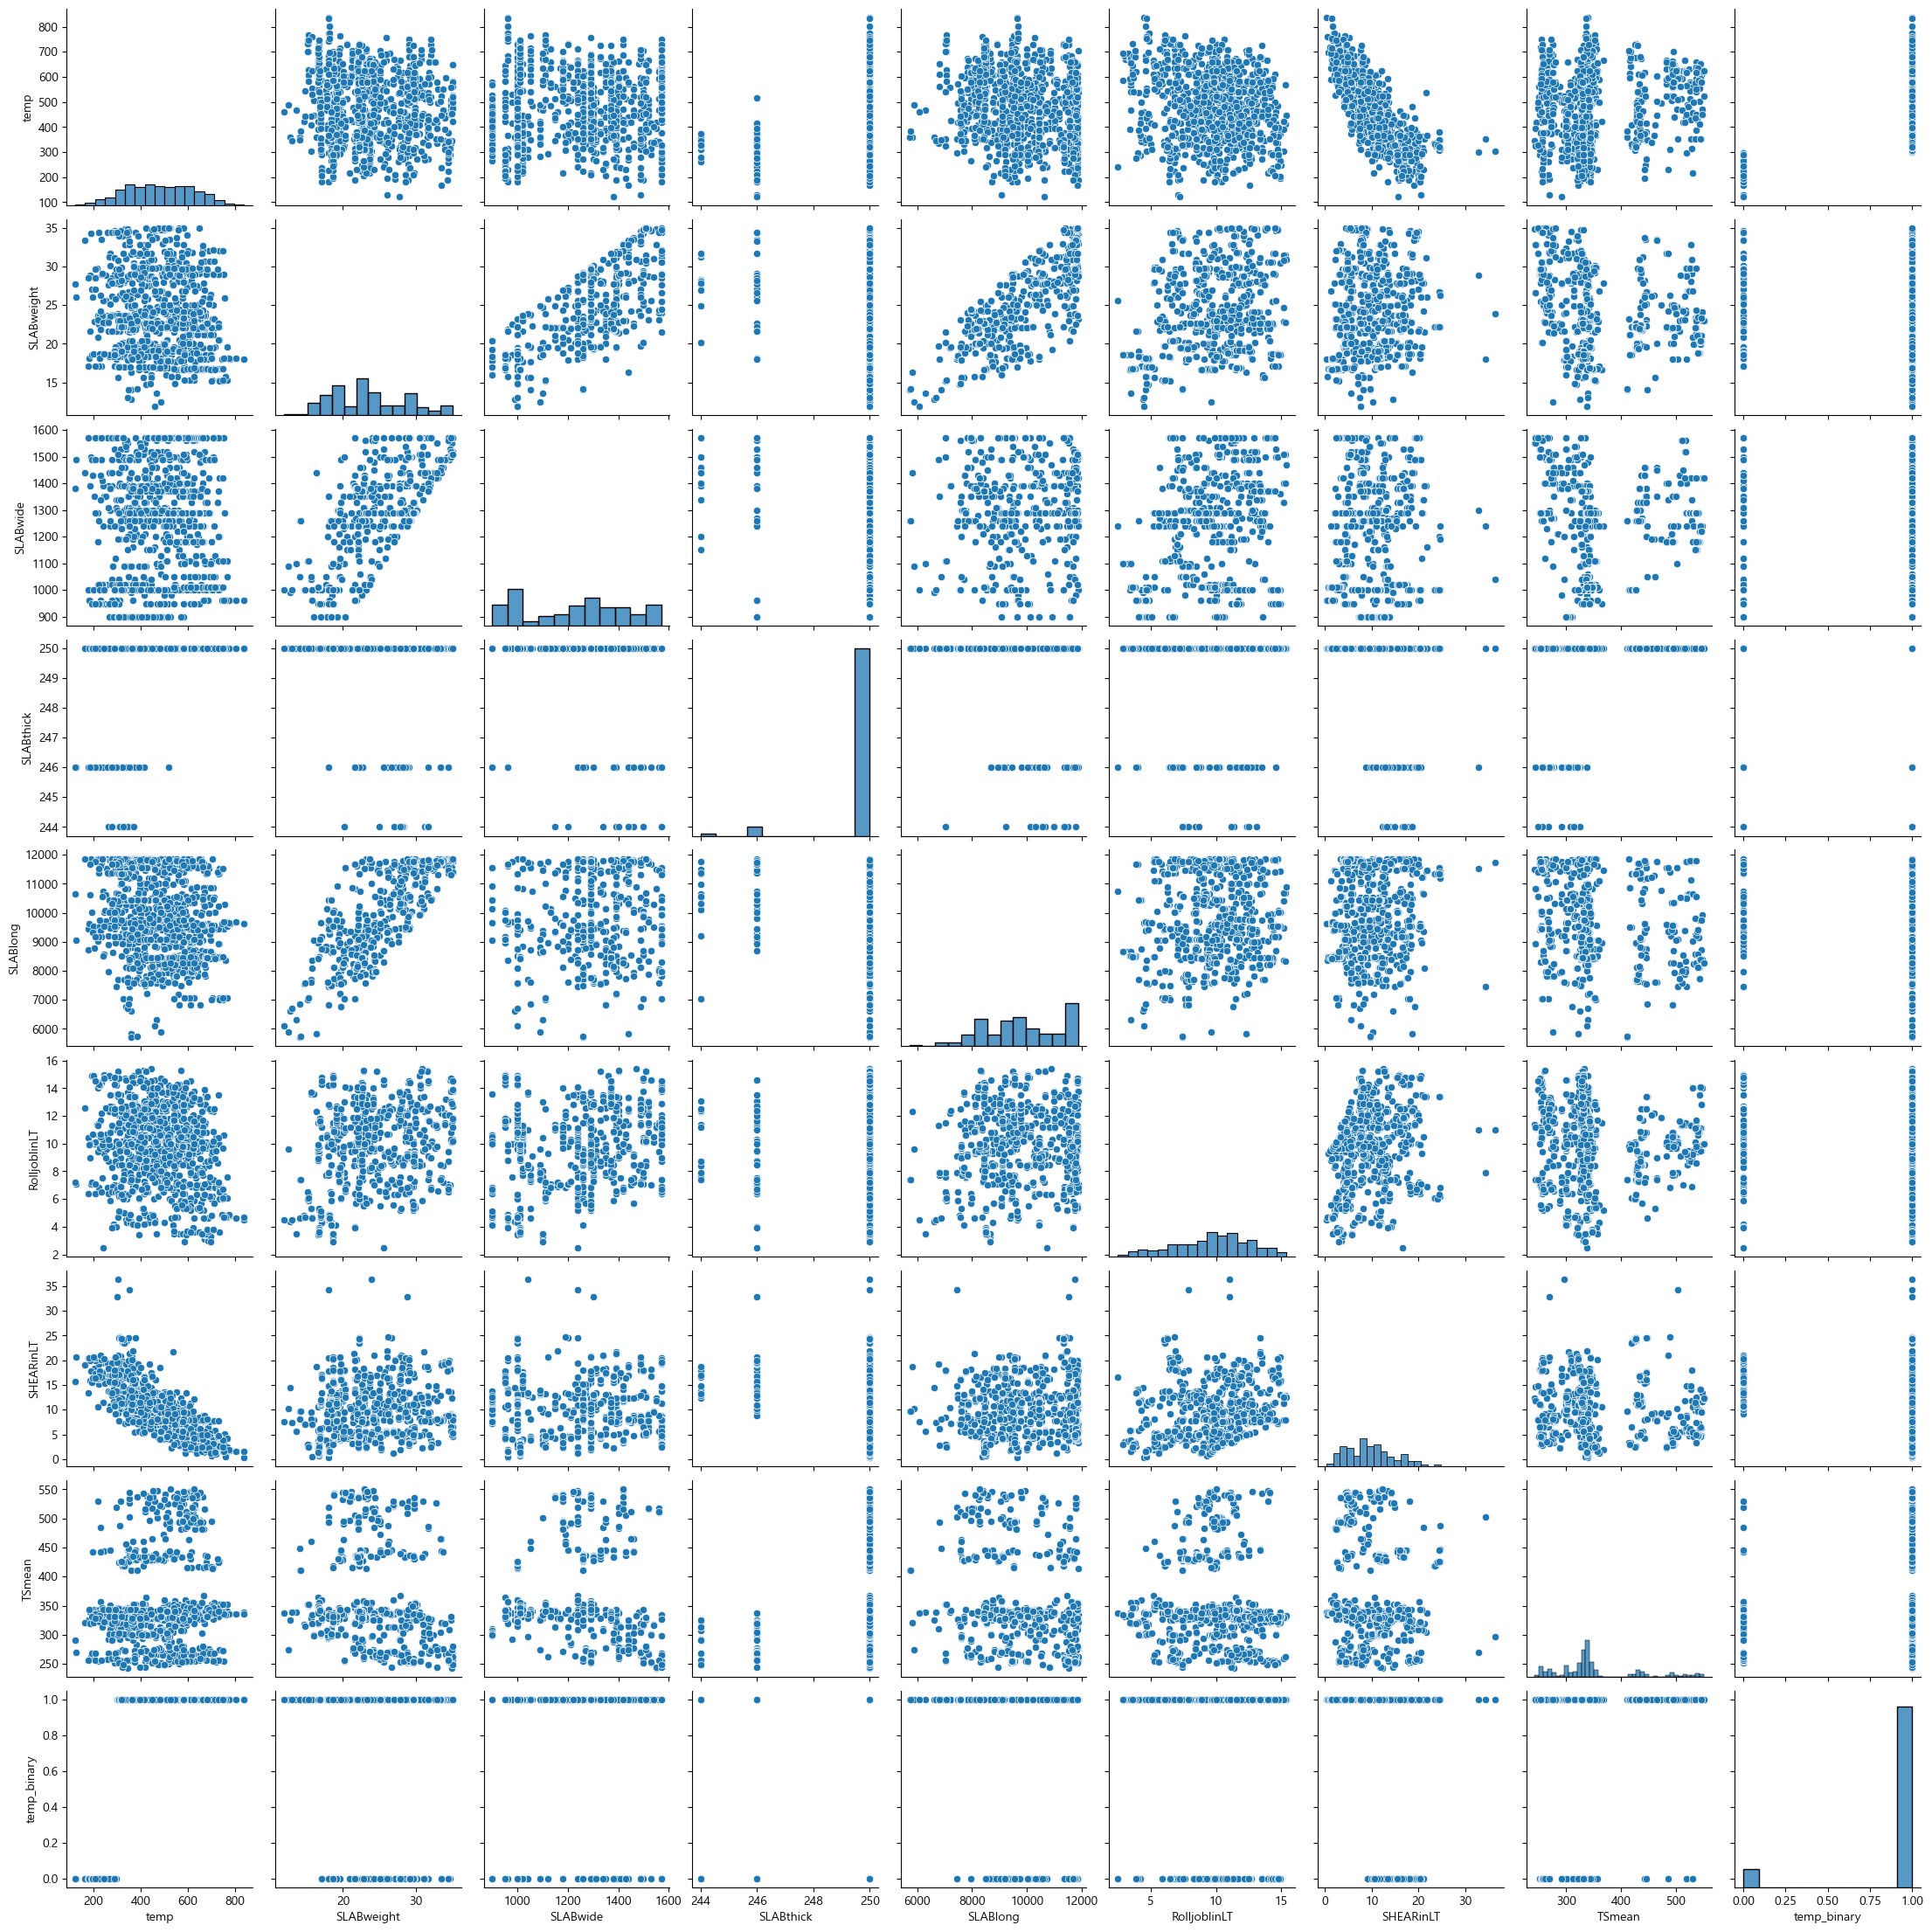

In [62]:
# 산점도 행렬
sns.pairplot(df_raw)

### 변수 간의 경향성 파악 - 상관관계 분석

In [67]:
# 상관 관계 분석
df_raw.corr().round(3)

# 체질 비만도 (FAT)와 가슴 둘레(CHEST), 복부둘레(ABDOMEN) 간의 높은 선형 관계 확인
# 설명변수 상관관계 : 다수 설명변수 간의 선형관계 확인 -> 다중공선성 확인 및 처리 필요

,temp,SLABweight,SLABwide,SLABthick,SLABlong,RolljoblinLT,SHEARinLT,TSmean,temp_binary
temp,1.000,-0.103,0.031,0.313,-0.222,-0.184,-0.797,0.134,0.540
SLABweight,-0.103,1.000,0.741,-0.172,0.651,0.254,0.155,-0.167,-0.049
SLABwide,0.031,0.741,1.000,-0.159,-0.018,0.301,0.060,-0.098,0.027
SLABthick,0.313,-0.172,-0.159,1.000,-0.115,0.017,-0.306,0.206,0.261
SLABlong,-0.222,0.651,-0.018,-0.115,1.000,0.057,0.210,-0.135,-0.120
RolljoblinLT,-0.184,0.254,0.301,0.017,0.057,1.000,0.206,-0.047,-0.060
SHEARinLT,-0.797,0.155,0.060,-0.306,0.210,0.206,1.000,-0.098,-0.415
TSmean,0.134,-0.167,-0.098,0.206,-0.135,-0.047,-0.098,1.000,0.107
temp_binary,0.540,-0.049,0.027,0.261,-0.120,-0.060,-0.415,0.107,1.000


### 회귀 모델 생성

In [95]:
# 데이터 처리
import pandas as pd
# 행렬 처리
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
 # qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot,add_constant
# 선형 모델 formula( y~ X1 + X2 +...)
import statsmodels.formula.api as smf
# 평가함수
from statsmodels.tools.eval_measures import rmse
# 결정계쑤 평가지표
from sklearn.metrics import r2_score
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 학습용 / 평가용 데이터 분리
df_train,df_test = train_test_split(df_raw,test_size=0.3,random_state=77)

print("학습용 데이터 크기 : {}".format(df_train.shape))
print("평가용 데이터 크기 : {}".format(df_test.shape))

학습용 데이터 크기 : (700, 9)
평가용 데이터 크기 : (301, 9)


In [101]:
# 선형 회귀 분석
reg_model = smf.ols(formula = "temp ~  SLABweight+ SLABwide+ SLABthick+ SLABlong+ RolljoblinLT+ SHEARinLT",data=df_train)

# 적합 
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     236.0
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          9.36e-164
Time:                        16:40:17   Log-Likelihood:                -4046.5
No. Observations:                 700   AIC:                             8107.
Df Residuals:                     693   BIC:                             8139.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2612.7092    811.498     -3.220   

In [ ]:
SLABwide SLABthick RolljoblinLT SHEARinLT

In [105]:
# 회귀 모델 생성 : 유의하지 않은 변수 제거 (p-value < 0.05 변수 선택)

# 선형 회귀 분석
reg_model = smf.ols(formula = "temp ~ SLABwide +SLABthick +RolljoblinLT+ SHEARinLT ",data=df_train)

# 적합 
reg_result = reg_model.fit()
print(reg_result.summary())

# 모델의 적합성 확인 (설명력) Anova 분석 결과 (모델 유의성 검정)
# 회귀 계수의 유의성 검정 p-value <0.05
# 잔차의 정규성 검정



                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     350.0
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          7.09e-165
Time:                        16:42:18   Log-Likelihood:                -4049.9
No. Observations:                 700   AIC:                             8110.
Df Residuals:                     695   BIC:                             8132.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2223.4980    760.750     -2.923   

<Axes: >

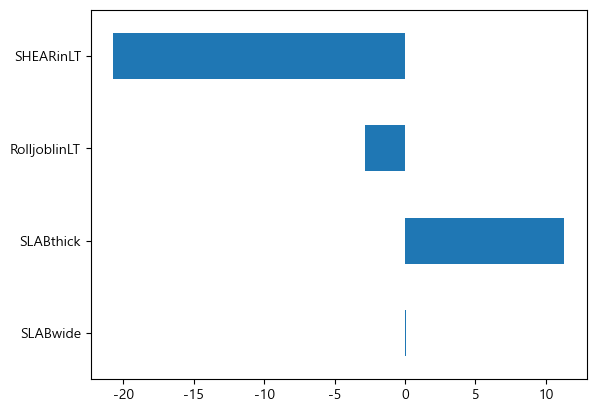

In [108]:
# 결론 도출

# 변수 중요도 확인
# 설명변수 중요도 확인
selected_cols = ['SLABwide' ,'SLABthick', 'RolljoblinLT', 'SHEARinLT']
df_reg_coef = pd.DataFrame({'Coef':reg_result.params.values[1:]},index= selected_cols)
df_reg_coef.plot.barh(y ='Coef',legend=False)

# SHEARinLT 가 낮을 수록 온도가 낮음
# SLABthick 가 높을 수록 온도가 높음

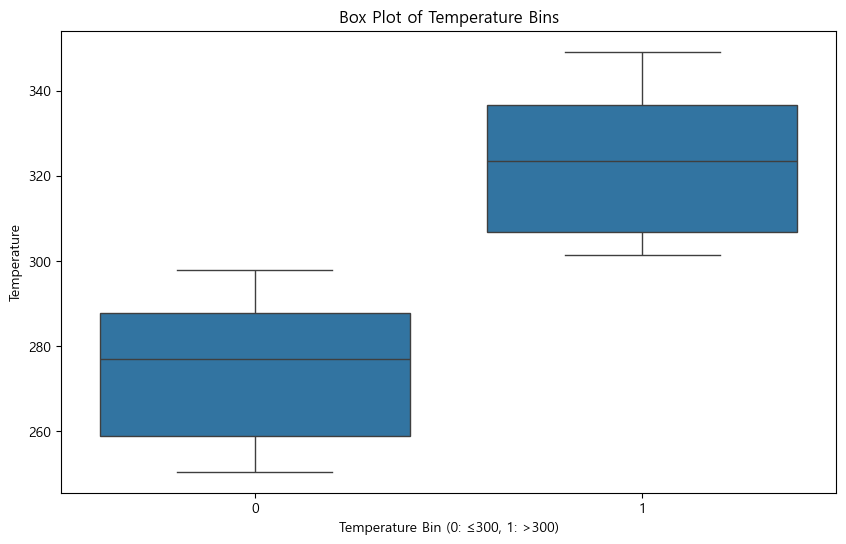